# Part 1: Project Data

In part 1, we will demonstrate comprehensive understanding of data on participated households, persons, and vehicles, including trip data.

* Data Upload
  
    Properly upload all required data sets. 

* Understanding Data on Participated Households, Persons, and Vehicles
  
    Provide socio-demographic statistics of participated households, include at least 3 graphs, compare participant demographics with general population using publicly available data.

* Understanding Trip Data
  
    Discuss number of trips recorded, used modes, trip purpose, etc., include at least 3 graphs.

* Exploring Zones
  
    Discuss NYC zones, number of trips each zone generated (attracted and produced), share of trips, area of each zone. Include at least one supporting graph, consider adding picture presenting map with zones.


In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import logit
import statsmodels.api as sm
import scipy as sp

Data Upload

In [4]:
#### Store the url string that hosts our .csv files 
#### Copy data files to the 2022CMS folder that should be in the same folder as this notebook
urlday = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Day_2022.csv"
urlhhl = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Household_2022.csv"
urlper = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Person_2022.csv"
urlzon = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Survey_Zones.csv"
urltrp = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Trip_2022.csv"
urlveh = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Vehicle_2022.csv"

#### Read the .csv file using `pandas` libriary and store it as a `pandas` Data Frame
dday = pd.read_csv(urlday)
dhhl = pd.read_csv(urlhhl)
dper = pd.read_csv(urlper)
dzon = pd.read_csv(urlzon)
dtrp = pd.read_csv(urltrp)
dveh = pd.read_csv(urlveh)

#### Finally, let's make sure that all columns are displayed
pd.set_option('display.max_columns', None)

In [5]:
dday.head(10)

,hh_id,num_trips,person_id,person_num,day_id,travel_dow,day_num,is_complete,travel_date,summary_complete,num_complete_trip_surveys,begin_day,end_day,telecommute_time,delivery_2,delivery_3,delivery_4,delivery_5,delivery_6,delivery_7,delivery_8,delivery_9,delivery_996,shop_online,no_travel_1,no_travel_2,no_travel_3,no_travel_4,no_travel_5,no_travel_6,no_travel_7,no_travel_8,no_travel_9,no_travel_11,no_travel_12,no_travel_13,no_travel_99,wkday_weight,svnday_weight
0,22000050,0,2200005001,1,220000500101,4,1,0,10/13/2022,1,0.0,1,997,995,0,0,0,1,0,0,0,0,0,0,995,995,995,995,995,995,995,995,995,995,995,995,995,0.000000,0.000000
1,22000050,2,2200005001,1,220000500102,5,2,1,10/14/2022,1,2.0,1,1,995,0,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,995,995,995,0.000000,215.724068
2,22000050,0,2200005001,1,220000500103,6,3,1,10/15/2022,1,0.0,1,1,995,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.000000,215.724068
3,22000050,0,2200005001,1,220000500104,7,4,0,10/16/2022,1,0.0,1,1,995,0,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,995,995,995,0.000000,0.000000
4,22000050,0,2200005001,1,220000500105,1,5,1,10/17/2022,1,0.0,1,1,995,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,359.540113,215.724068
5,22000050,2,2200005001,1,220000500106,2,6,1,10/18/2022,1,2.0,1,1,995,0,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,995,995,995,359.540113,215.724068
6,22000050,0,2200005001,1,220000500107,3,7,1,10/19/2022,1,0.0,1,1,995,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,359.540113,215.724068
7,22000105,14,2200010501,1,220001050101,1,1,1,10/17/2022,1,14.0,1,1,450,0,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,995,995,995,861.630290,492.360166
8,22000105,4,2200010501,1,220001050102,2,2,1,10/18/2022,1,4.0,1,1,450,0,0,0,0,0,0,0,0,1,1,995,995,995,995,995,995,995,995,995,995,995,995,995,861.630290,492.360166
9,22000105,10,2200010501,1,220001050103,3,3,1,10/19/2022,1,10.0,1,1,0,0,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,995,995,995,861.630290,492.360166


In [6]:
dhhl.head(10)

,hh_id,hh_cms_zone_gp,participation_group,signup_platform,diary_platform,num_days_complete,num_days_complete_weekday,num_days_complete_weekend,num_complete_mon,num_complete_tue,num_complete_wed,num_complete_thu,num_complete_fri,num_complete_sat,num_complete_sun,num_people,r_num_people,num_adults,num_kids,num_students,num_workers,num_vehicles,r_num_vehicles,num_trips,income_broad,primary_language,residence_type,residence_rent_own,home_county,vehicle_change,reduced_veh_1,reduced_veh_2,reduced_veh_3,reduced_veh_4,reduced_veh_5,reduced_veh_6,reduced_veh_7,reduced_veh_8,reduced_veh_997,increased_veh_1,increased_veh_2,increased_veh_3,increased_veh_4,increased_veh_5,increased_veh_6,increased_veh_7,increased_veh_8,increased_veh_997,ev_typical_charge_1,ev_typical_charge_2,ev_typical_charge_3,ev_typical_charge_4,ev_typical_charge_5,ev_typical_charge_6,ev_typical_charge_7,ev_typical_charge_997,ev_purchase,ev_purchase_barriers_1,ev_purchase_barriers_2,ev_purchase_barriers_3,ev_purchase_barriers_4,ev_purchase_barriers_5,num_bicycles,bicycle_type_1,bicycle_type_2,bicycle_type_997,bike_change,reduced_bike_1,reduced_bike_2,reduced_bike_3,reduced_bike_4,reduced_bike_5,reduced_bike_6,reduced_bike_7,reduced_bike_8,reduced_bike_997,increased_bike_1,increased_bike_2,increased_bike_3,increased_bike_4,increased_bike_5,increased_bike_6,increased_bike_7,increased_bike_8,increased_bike_9,increased_bike_997,bike_store_1,bike_store_2,bike_store_3,bike_store_4,bike_store_5,bike_store_6,bike_store_8,bike_store_9,bike_store_997,num_scooters,scooter_typical_charge_1,scooter_typical_charge_2,scooter_typical_charge_4,scooter_typical_charge_5,scooter_typical_charge_6,scooter_typical_charge_7,scooter_typical_charge_997,packages,hh_weight
0,22000050,1,9,rmove,rmove,5,4,1,1,1,1,0,1,1,0,3,3,3,0,1,1,1,1,4,3,1,4,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,1,0,0,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,0,0,0,0,0,0,0,0,995,995,995,995,995,995,995,995,2,359.540113
1,22000105,1,9,rmove,rmove,7,5,2,1,1,1,1,1,1,1,2,2,2,0,0,1,0,0,61,3,1,2,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,0,995,995,995,1,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,4,1723.260580
2,22000128,1,9,rmove,rmove,6,4,2,1,1,0,1,1,1,1,5,5,3,2,0,1,1,1,53,4,1,4,2,36005,2,995,995,995,995,995,995,995,995,995,0,1,0,0,1,1,1,1,0,995,995,995,995,995,995,995,995,3,1,0,0,0,0,0,995,995,995,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,2,1163.731813
3,22000430,1,9,rmove,rmove,7,5,2,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,30,3,1,4,2,36005,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,995,995,995,995,995,0,995,995,995,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,997,203.870573
4,22000460,1,9,rmove,rmove,5,4,1,0,1,1,1,1,0,1,1,1,1,0,0,1,0,0,9,3,1,4,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,0,995,995,995,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,177.370464
5,22000533,1,9,rmove,rmove,7,5,2,1,1,1,1,1,1,1,2,2,2,0,0,2,0,0,41,2,1,4,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,1,0,0,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,0,0,0,0,0,0,0,0,995,995,995,995,995,995,995,995,2,959.715717
6,22000607,1,3,browser,rmove,7,5,2,1,1,1,1,1,1,1,3,3,2,1,0

In [7]:
dper.head(10)

,hh_id,num_trips,num_days_complete,person_id,person_num,is_participant,phone_type,relationship,age,r_age,race_1,race_2,race_3,race_4,race_5,race_6,race_997,race_999,r_race,ethnicity_1,ethnicity_2,ethnicity_3,ethnicity_4,ethnicity_5,ethnicity_997,ethnicity_999,r_ethnicity,gender,can_drive,disability,disability_follow_1,disability_follow_2,disability_follow_3,disability_follow_4,disability_follow_5,disability_follow_6,disability_follow_996,disability_follow_999,education,employment,worker,num_jobs,job_type,industry,work_in_region,work_county,work_cms_zone,wfh_policy,commute_freq,telework_freq,r_telework_freq,work_mode,r_work_mode,work_mode_own,work_mode_auto,work_park_loc,work_park_pay,work_park_cost,work_park_amount,work_mode_taxi,work_mode_bus,work_mode_rail,work_mode_ferry,work_mode_bike,work_bike_park,work_mode_scooter,work_scooter_park,student,r_student,school_type,r_school_type,school_in_region,school_county,school_freq,remote_class_freq,school_mode,school_mode_own,school_mode_auto,school_park_loc,school_park_cost,school_park_amount,school_mode_taxi,school_mode_bus,school_mode_rail,school_mode_ferry,school_mode_bike,school_bike_park,school_mode_scooter,school_scooter_park,home_park_1,home_park_2,home_park_3,home_park_pay,home_park_cost,home_park_amount,second_home,second_home_freq,second_home_in_region,second_home_county,share_1,share_2,share_3,share_4,share_5,share_6,share_996,tnc_freq,tnc_purp,carshare_freq,vehicle,bike_freq,bike_purp_1,bike_purp_2,bike_purp_3,bike_purp_4,bike_purp_5,bike_purp_6,bike_purp_997,no_bike_nyc_1,no_bike_nyc_2,no_bike_nyc_3,no_bike_nyc_4,no_bike_nyc_5,no_bike_nyc_6,no_bike_nyc_7,no_bike_nyc_9,no_bike_nyc_997,no_freq_bike_nyc_1,no_freq_bike_nyc_2,no_freq_bike_nyc_3,no_freq_bike_nyc_4,no_freq_bike_nyc_5,no_freq_bike_nyc_6,no_freq_bike_nyc_997,no_freq_bike_nyc_other,bike_stolen,citi_bike_freq,citi_bike_type,citi_bike_pay,citi_bike_alt_mode,no_bike_share_1,no_bike_share_2,no_bike_share_3,no_bike_share_4,no_bike_share_5,no_bike_share_6,no_bike_share_7,no_bike_share_8,no_bike_share_997,micromobility_devices_204,micromobility_devices_83,micromobility_devices_205,micromobility_devices_73,micromobility_devices_206,micromobility_devices_207,micromobility_devices_996,kid_accompany,kid_mode,r_kid_mode,kid_mode_own,kid_mode_auto,kid_mode_taxi,kid_mode_bus,kid_mode_rail,kid_mode_ferry,kid_access,kid_egress,kid_mode_bike,kid_mode_scooter,harassment,harassment_change_1,harassment_change_2,harassment_change_3,harassment_change_4,harassment_change_5,harassment_change_6,harassment_change_7,harassment_change_8,harassment_change_9,harassment_change_10,harassment_change_996,harassment_change_997,person_weight
0,22000050,4,5,2200005001,1,1,995,0,6,3,0,0,0,0,0,0,1,0,6,0,0,1,0,1,0,0,7,2,3,0,995,995,995,995,995,995,995,995,5,6,0,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,3,2,997,7,1,36061.0,995,6,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,995,995,NaN,0,995,0,NaN,1,0,0,0,0,0,0,6,995,995,995,3,1,0,1,0,0,0,0,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,0,1,995,995,995,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,995,995,995,995,995,995,995,995,995,995,995,995,995,1,0,1,0,0,0,1,0,0,0,0,0,0,1078.620338
1,22000105,61,7,2200010501,1,1,995,0,8,3,0,0,0,0,0,0,1,0,6,0,0,1,0,0,0,0,3,2,1,0,995,995,995,995,995,995,995,995,3,1,1,1,1,8,1,36061.0,3,1,1,995,996,102,102,995,995,995,995,995,NaN,995,23,995,995,995,995,995,995,2,3,995,995,995,NaN,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,995,995,NaN,0,995,0,NaN,0,0,0,0,0,0,1,995,995,995,995,996,995,995,995,995,995,995,995,0,0,0,0,0,0,0,0,1,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,0,0,0,0,0,0,1,995,995,995,995,995,995,995,995,995,995,995,995,995,4,995,995,995,995,995,995,995,995,995,995,995,995,3446.521161
2,22000128,53,6,2200012801,1,1,995,0,6,3,0,0,0,0,0,0,0,1,999,0,0,0,0,1,0,0,5,1,1,0,995,995,995,995,995,995,995,995

In [8]:
dzon.head(10)

,Shape,CMS Zone
0,MULTIPOLYGON (((-73.82656709083903 40.77065046...,Middle Queens
1,MULTIPOLYGON (((-74.00869559889541 40.68619331...,Inner Brooklyn
2,MULTIPOLYGON (((-73.78833338088718 40.83466780...,Northern Bronx
3,MULTIPOLYGON (((-73.86925732173215 40.58191015...,Outer Brooklyn
4,MULTIPOLYGON (((-73.86978222880252 40.78534684...,LGA
5,MULTIPOLYGON (((-73.96067204645479 40.74405121...,Inner Queens
6,MULTIPOLYGON (((-73.74706587407947 40.63717004...,JFK
7,MULTIPOLYGON (((-73.7664825742497 40.614080973...,Outer Queens
8,MULTIPOLYGON (((-73.91443837702195 40.79566608...,Upper Manhattan
9,MULTIPOLYGON (((-73.88858567810188 40.79870666...,Southern Bronx


In [9]:
dtrp.head(10)

,hh_id,person_id,person_num,day_id,travel_dow,day_num,is_complete,travel_date,linked_trip_id,linked_leg_num,trip_id,trip_num,day_is_complete,arrive_dow,depart_dow,o_in_region,o_county,d_in_region,d_county,mode_type_nyc,r_mode_type_nyc,mode_1,mode_2,mode_3,mode_priority_nyc,transit_access,r_transit_access,transit_egress,r_transit_egress,park_location,park_type,park_pay,park_cost,ev_charge_station,ev_charge_station_level_1,ev_charge_station_level_2,ev_charge_station_level_3,ev_charge_station_level_4,ev_charge_station_level_5,ev_charge_station_level_997,ev_charge_station_level_998,tnc_type,taxi_type,taxi_pay,taxi_cost,transit_type,bike_park_loc,scooter_park_location,num_travelers,num_hh_travelers,num_non_hh_travelers,hh_member_1,hh_member_2,hh_member_3,hh_member_4,hh_member_5,hh_member_6,hh_member_7,hh_member_8,hh_member_9,hh_member_10,hh_member_11,hh_member_12,driver,o_purpose,o_purpose_category,d_purpose,d_purpose_category,d_purpose_category_linked,r_d_purpose_category_linked,work_trip,depart_date,depart_hour,depart_minute,depart_seconds,r_timeofday,arrive_date,arrive_hour,arrive_minute,arrive_second,duration_minutes,r_duration_minutes,duration_seconds,distance_miles,r_distance_miles,dwell_mins,high_speed_flag,long_distance_flag,o_cms_zone,d_cms_zone,unlinked_trip,o_location_type,d_location_type,trip_wkday_weight,trip_svnday_weight
0,22000050,2200005001,1,220000500102,5,2,1,10/14/2022,2200005001001,1,2200005001001,1,1,5,5,1,36005,1,36061,9,4,1,995,995,1,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,1,1,0,1,0,0,995,995,995,995,995,995,995,995,995,995,1,1,37,10,10,7,0,10/14/2022,13,46,20,2,10/14/2022,14,0,55,15,2,875,0.570632,1,0.000000,0,0,2,3,0,1,4,0.000000,215.724068
1,22000050,2200005001,1,220000500102,5,2,1,10/14/2022,2200005001002,1,2200005001002,2,1,5,5,1,36061,1,36005,9,4,1,995,995,1,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,1,1,0,1,0,0,995,995,995,995,995,995,995,995,995,995,37,10,1,1,1,1,0,10/14/2022,14,0,55,2,10/14/2022,17,12,43,192,4,11508,0.453004,1,5856.666667,0,0,3,2,0,4,1,0.000000,215.724068
2,22000050,2200005001,1,220000500106,2,6,1,10/18/2022,2200005001003,1,2200005001003,3,1,2,2,1,36005,1,36061,9,4,1,995,995,1,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,1,1,0,1,0,0,995,995,995,995,995,995,995,995,995,995,1,1,32,7,7,7,0,10/18/2022,18,49,23,4,10/18/2022,19,7,5,18,2,1062,0.736290,1,14.716667,0,0,2,3,0,1,4,359.540113,215.724068
3,22000050,2200005001,1,220000500106,2,6,1,10/18/2022,2200005001004,1,2200005001004,4,1,2,2,1,36061,1,36005,9,4,1,995,995,1,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,1,1,0,1,0,0,995,995,995,995,995,995,995,995,995,995,32,7,1,1,1,1,0,10/18/2022,19,21,48,4,10/18/2022,19,48,16,26,3,1588,0.274326,1,431.733333,0,0,3,2,0,4,1,359.540113,215.724068
4,22000105,2200010501,1,220001050101,1,1,1,10/17/2022,2200010501001,1,2200010501001,1,1,1,1,1,36061,1,36061,9,4,1,995,995,1,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,1,1,0,1,0,995,995,995,995,995,995,995,995,995,995,2,10,2,10,2,2,2,1,10/17/2022,12,4,58,2,10/17/2022,13,1,40,57,3,3402,0.485176,1,127.200000,0,0,3,3,0,2,2,861.630290,492.360166
5,22000105,2200010501,1,220001050101,1,1,1,10/17/2022,2200010501002,1,2200010501002,2,1,1,1,1,36061,1,36061,9,4,1,995,995,1,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,1,1,0,1,0,995,995,995,995,995,995,995,995,995,995,2,10,2,33,10,10,7,0,10/17/2022,15,8,52,3,10/17/2022,15,14,24,6,1,332,0.248132,1,0.000000,0,0,3,3,0,2,4,861.630290,492.360166
6,22000105,2200010501,1,220001050101,1,1,1,10/17/2022,2200010501003,1,2200010501003,3,1,1,1,1,36061,1,36061,9,4,1,995,995,1,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,1,1,0,1,0,995,995,995,995,995,995,995,995,995,995,2,33,10,60,11,11,11,0,10/17/2022

In [10]:
dveh.head(10)

,hh_id,vehicle_id,vehicle_num,year,fuel_type,hh_weight
0,22000050,2200005001,1,1998,1,359.540113
1,22000128,2200012801,1,2022,1,1163.731813
2,22000430,2200043001,1,2017,1,203.870573
3,22000607,2200060701,1,2021,1,3174.256313
4,22000655,2200065501,1,2020,1,333.376799
5,22000768,2200076801,1,2015,1,67.920338
6,22000991,2200099101,1,2021,1,2740.263676
7,22001276,2200127601,1,2018,1,288.911439
8,22001518,2200151801,1,2016,1,406.766059
9,22001566,2200156601,1,2014,1,5043.332421


## Undersytanding Data On Participated Households, Persons, and Vehicles
    Provide socio-demographic statistics of participated households, include at least 3 graphs, compare participant demographics with general population using publicly available data.

In [11]:
for i in range(len(dhhl.columns)):
    print(dhhl.columns[i])

hh_id
hh_cms_zone_gp
participation_group
signup_platform
diary_platform
num_days_complete
num_days_complete_weekday
num_days_complete_weekend
num_complete_mon
num_complete_tue
num_complete_wed
num_complete_thu
num_complete_fri
num_complete_sat
num_complete_sun
num_people
r_num_people
num_adults
num_kids
num_students
num_workers
num_vehicles
r_num_vehicles
num_trips
income_broad
primary_language
residence_type
residence_rent_own
home_county
vehicle_change
reduced_veh_1
reduced_veh_2
reduced_veh_3
reduced_veh_4
reduced_veh_5
reduced_veh_6
reduced_veh_7
reduced_veh_8
reduced_veh_997
increased_veh_1
increased_veh_2
increased_veh_3
increased_veh_4
increased_veh_5
increased_veh_6
increased_veh_7
increased_veh_8
increased_veh_997
ev_typical_charge_1
ev_typical_charge_2
ev_typical_charge_3
ev_typical_charge_4
ev_typical_charge_5
ev_typical_charge_6
ev_typical_charge_7
ev_typical_charge_997
ev_purchase
ev_purchase_barriers_1
ev_purchase_barriers_2
ev_purchase_barriers_3
ev_purchase_barriers_4
e

In [12]:
dhhl = dhhl[(dhhl['income_broad'] != 995) & (dhhl['income_broad'] != 999)]
dhhl.head(10)

,hh_id,hh_cms_zone_gp,participation_group,signup_platform,diary_platform,num_days_complete,num_days_complete_weekday,num_days_complete_weekend,num_complete_mon,num_complete_tue,num_complete_wed,num_complete_thu,num_complete_fri,num_complete_sat,num_complete_sun,num_people,r_num_people,num_adults,num_kids,num_students,num_workers,num_vehicles,r_num_vehicles,num_trips,income_broad,primary_language,residence_type,residence_rent_own,home_county,vehicle_change,reduced_veh_1,reduced_veh_2,reduced_veh_3,reduced_veh_4,reduced_veh_5,reduced_veh_6,reduced_veh_7,reduced_veh_8,reduced_veh_997,increased_veh_1,increased_veh_2,increased_veh_3,increased_veh_4,increased_veh_5,increased_veh_6,increased_veh_7,increased_veh_8,increased_veh_997,ev_typical_charge_1,ev_typical_charge_2,ev_typical_charge_3,ev_typical_charge_4,ev_typical_charge_5,ev_typical_charge_6,ev_typical_charge_7,ev_typical_charge_997,ev_purchase,ev_purchase_barriers_1,ev_purchase_barriers_2,ev_purchase_barriers_3,ev_purchase_barriers_4,ev_purchase_barriers_5,num_bicycles,bicycle_type_1,bicycle_type_2,bicycle_type_997,bike_change,reduced_bike_1,reduced_bike_2,reduced_bike_3,reduced_bike_4,reduced_bike_5,reduced_bike_6,reduced_bike_7,reduced_bike_8,reduced_bike_997,increased_bike_1,increased_bike_2,increased_bike_3,increased_bike_4,increased_bike_5,increased_bike_6,increased_bike_7,increased_bike_8,increased_bike_9,increased_bike_997,bike_store_1,bike_store_2,bike_store_3,bike_store_4,bike_store_5,bike_store_6,bike_store_8,bike_store_9,bike_store_997,num_scooters,scooter_typical_charge_1,scooter_typical_charge_2,scooter_typical_charge_4,scooter_typical_charge_5,scooter_typical_charge_6,scooter_typical_charge_7,scooter_typical_charge_997,packages,hh_weight
0,22000050,1,9,rmove,rmove,5,4,1,1,1,1,0,1,1,0,3,3,3,0,1,1,1,1,4,3,1,4,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,1,0,0,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,0,0,0,0,0,0,0,0,995,995,995,995,995,995,995,995,2,359.540113
1,22000105,1,9,rmove,rmove,7,5,2,1,1,1,1,1,1,1,2,2,2,0,0,1,0,0,61,3,1,2,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,0,995,995,995,1,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,4,1723.260580
2,22000128,1,9,rmove,rmove,6,4,2,1,1,0,1,1,1,1,5,5,3,2,0,1,1,1,53,4,1,4,2,36005,2,995,995,995,995,995,995,995,995,995,0,1,0,0,1,1,1,1,0,995,995,995,995,995,995,995,995,3,1,0,0,0,0,0,995,995,995,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,2,1163.731813
3,22000430,1,9,rmove,rmove,7,5,2,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,30,3,1,4,2,36005,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,995,995,995,995,995,0,995,995,995,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,997,203.870573
4,22000460,1,9,rmove,rmove,5,4,1,0,1,1,1,1,0,1,1,1,1,0,0,1,0,0,9,3,1,4,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,0,995,995,995,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,177.370464
5,22000533,1,9,rmove,rmove,7,5,2,1,1,1,1,1,1,1,2,2,2,0,0,2,0,0,41,2,1,4,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,1,0,0,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,0,0,0,0,0,0,0,0,995,995,995,995,995,995,995,995,2,959.715717
6,22000607,1,3,browser,rmove,7,5,2,1,1,1,1,1,1,1,3,3,2,1,0

In [13]:
def income_level(x):
    if x in [1,2]:
        return "Low-Income"
    elif x in [3,4]:
        return "Middle-Income"
    else:
        return "High-Income"

dhhl['income_level'] = dhhl['income_broad'].apply(income_level)
dhhl_income = dhhl.groupby('income_level').size()
print(f"income distribution:\n{dhhl_income}")

income distribution:
income_level
High-Income      1060
Low-Income        784
Middle-Income     797
dtype: int64


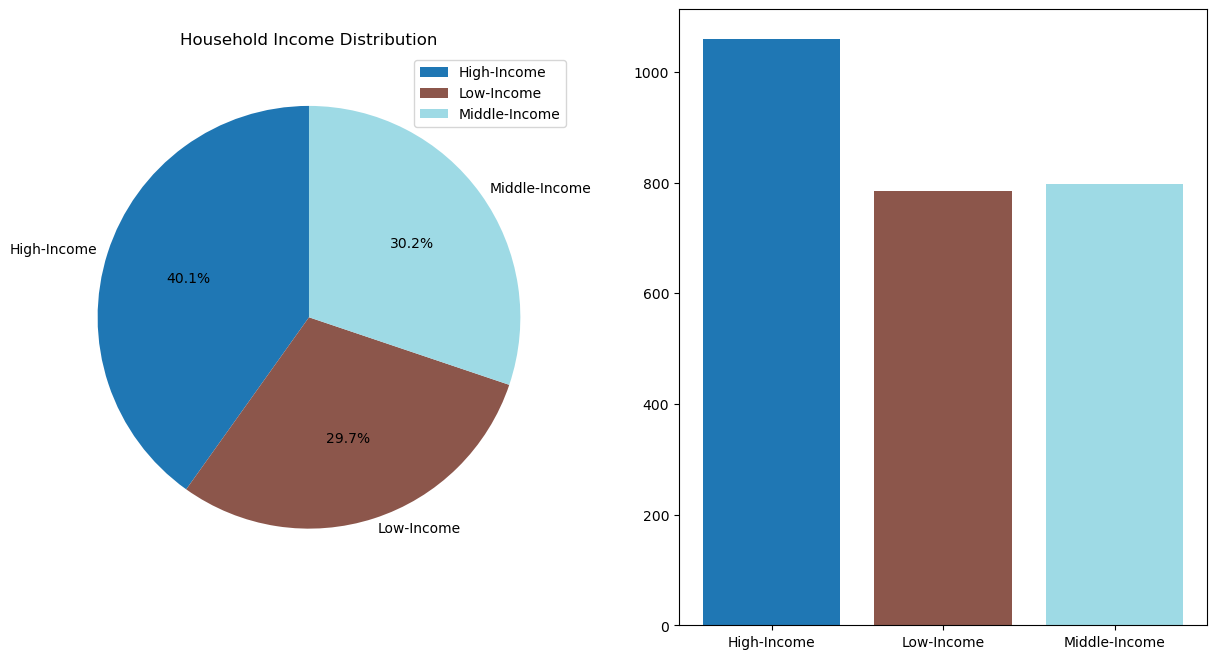

In [14]:
labels = dhhl_income.index
sizes = dhhl_income.values

cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(sizes)))

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.6, labeldistance=1.05, colors=colors)


plt.title('Household Income Distribution')
plt.legend(loc='best')


plt.subplot(1,2,2)
plt.bar(x=labels, height=sizes, color=colors)
plt.show()


In [15]:
dhhl=dhhl[dhhl['primary_language'].isin([1,2,3,4])]


language = {1:'English',
            2:'Spanish',
            3:'Chinese',
            4:'Russian'}

dhhl['language'] = dhhl['primary_language'].map(language)
dhhl_language = dhhl.groupby('language').size()

print(f'Primary language distribution:\n{dhhl_language}')


Primary language distribution:
language
Chinese     120
English    2194
Russian      30
Spanish     171
dtype: int64


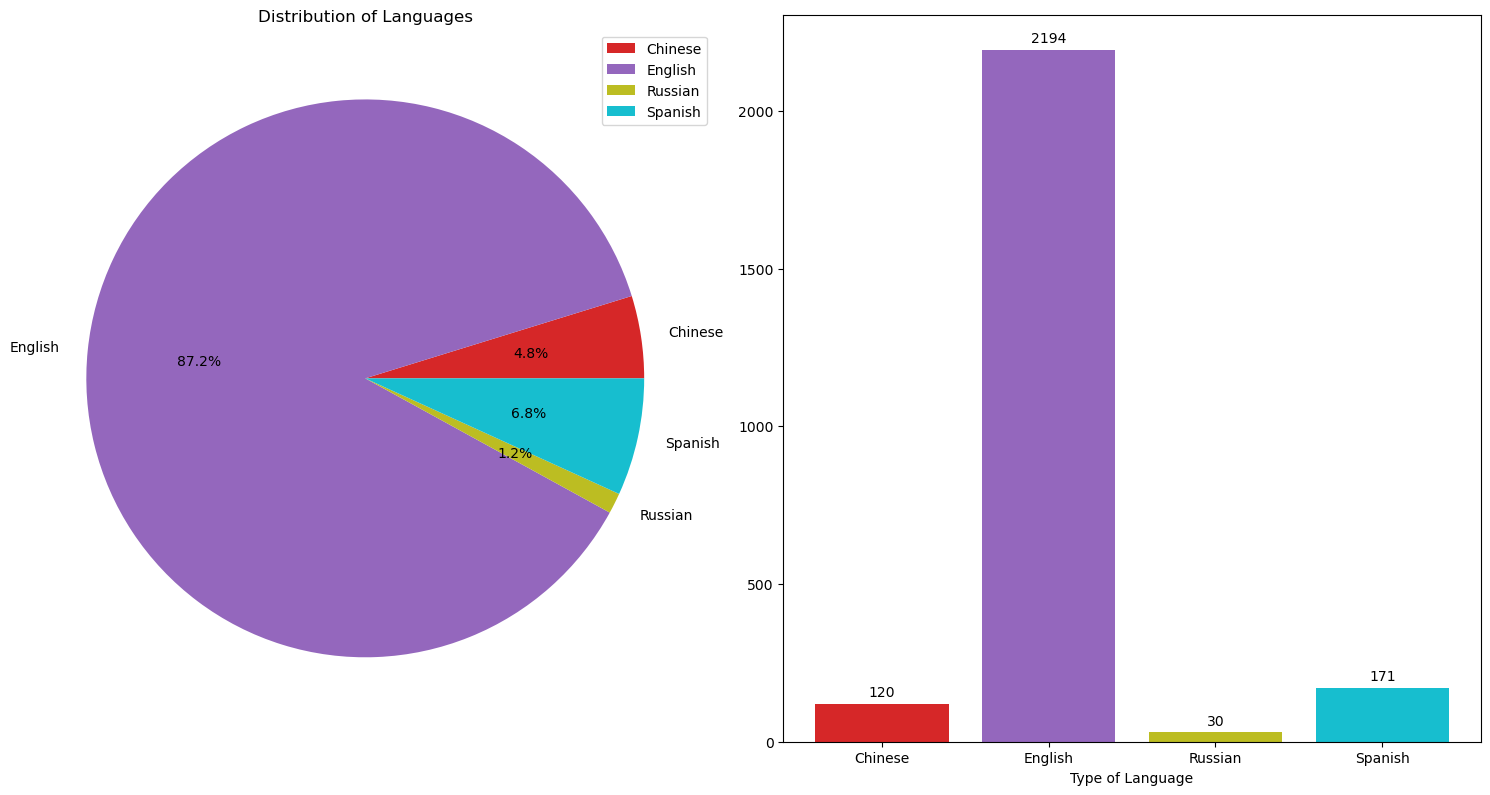

In [16]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
pie = plt.pie(dhhl_language.values,labels=dhhl_language.index,autopct='%1.1f%%',colors=['#d62728', '#9467bd','#bcbd22', '#17becf'])
plt.title('Distribution of Languages')
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(1,2,2)
bars = plt.bar(dhhl_language.index, dhhl_language.values, color=['#d62728', '#9467bd','#bcbd22', '#17becf'])
plt.bar_label(bars, label_type='edge', padding=3)
plt.xlabel('Type of Language')
plt.tight_layout()
plt.show()


In [20]:
dhhl = dhhl[dhhl['num_vehicles'] != '995']
dhhl_numvehicles = dhhl.groupby('num_vehicles').size()

print(f"The distribution of number of vehicles in households:\n{dhhl_numvehicles}")

The distribution of number of vehicles in households:
num_vehicles
0    1272
1     922
2     261
3      46
4       7
5       5
6       1
8       1
dtype: int64


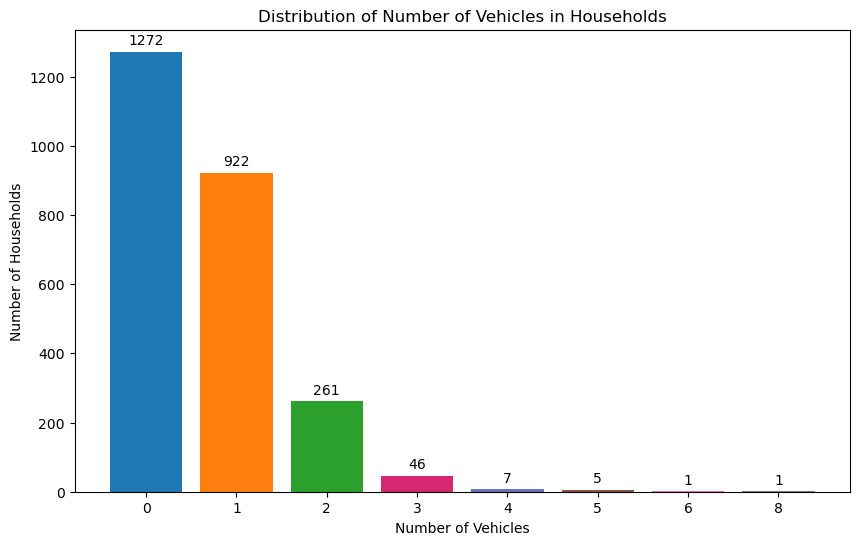

In [23]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', "#d62770", "#6774bd", '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', "#17cf45"]


x_positions = range(len(dhhl_numvehicles))

plt.figure(figsize=(10,6))
bar2 = plt.bar(x_positions, dhhl_numvehicles.values, color=colors[:len(dhhl_numvehicles)])
plt.bar_label(bar2, padding=3)

plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Households')
plt.title('Distribution of Number of Vehicles in Households')
plt.xticks(x_positions, dhhl_numvehicles.index)

plt.show()


In [18]:
dhhl = dhhl[~dhhl['num_people'].isin(['995'])]
dhhl_numpeople = dhhl.groupby('num_people').size()

print(f"The distribution of number of people in households:\n{dhhl_numpeople}")

The distribution of number of people in households:
num_people
1    808
2    850
3    406
4    284
5    102
6     47
7     11
8      5
9      2
dtype: int64


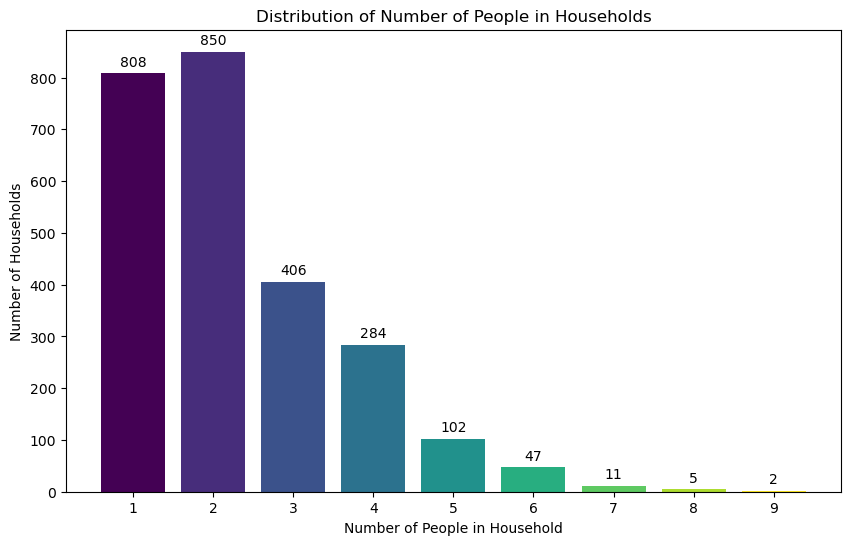

In [19]:
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(dhhl_numpeople)))

plt.figure(figsize=(10,6))
bar1 = plt.bar(dhhl_numpeople.index, dhhl_numpeople.values, color=colors)
plt.bar_label(bar1, padding=3)
plt.xlabel('Number of People in Household')
plt.ylabel('Number of Households')
plt.title('Distribution of Number of People in Households')
plt.xticks(dhhl_numpeople.index)
plt.show()

## Understanding Trip Data
    Discuss number of trips recorded, used modes, trip purpose, etc., include at least 3 graphs.

In [24]:
for i in range(len(dtrp.columns)):
    print(dtrp.columns[i])

hh_id
person_id
person_num
day_id
travel_dow
day_num
is_complete
travel_date
linked_trip_id
linked_leg_num
trip_id
trip_num
day_is_complete
arrive_dow
depart_dow
o_in_region
o_county
d_in_region
d_county
mode_type_nyc
r_mode_type_nyc
mode_1
mode_2
mode_3
mode_priority_nyc
transit_access
r_transit_access
transit_egress
r_transit_egress
park_location
park_type
park_pay
park_cost
ev_charge_station
ev_charge_station_level_1
ev_charge_station_level_2
ev_charge_station_level_3
ev_charge_station_level_4
ev_charge_station_level_5
ev_charge_station_level_997
ev_charge_station_level_998
tnc_type
taxi_type
taxi_pay
taxi_cost
transit_type
bike_park_loc
scooter_park_location
num_travelers
num_hh_travelers
num_non_hh_travelers
hh_member_1
hh_member_2
hh_member_3
hh_member_4
hh_member_5
hh_member_6
hh_member_7
hh_member_8
hh_member_9
hh_member_10
hh_member_11
hh_member_12
driver
o_purpose
o_purpose_category
d_purpose
d_purpose_category
d_purpose_category_linked
r_d_purpose_category_linked
work_trip
d